In [1]:
# В этом ноутбуке используем статистики число событий и разнообразие категорий, 
# чтобы найти пользователей с большим числом событий и малым разнообразием категорий.
# Среди найденных пользователей случайно выбирается несколько для ручного визуального анализа лога событий.

In [12]:
import glob

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

DATA_PATH = '../../data/cosmetics_ecommerce_events'
RESULTS_PATH = '../../results/cosmetics_ecommerce_events/exploratory_users_category_events_examples'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #last_expr

In [3]:
df = pd.read_csv(f'{DATA_PATH}/2019-Oct.csv')

In [4]:
# По результатам предыдущего исследования - предлагается рассмотреть только события корзины

df.shape

user_events = df[['user_id', 'user_session', 'event_time', 'product_id', 'event_type', 'price', 'category_id', 'brand']]

user_events = user_events[user_events['event_type'] == 'cart']

user_events.shape

(4102283, 9)

(1232385, 8)

In [5]:
# events counts
events_count_per_user = user_events.groupby(['user_id'])['event_type'].count()
events_count_per_user.shape

user_stats = events_count_per_user.to_frame().rename(columns={'event_type': 'events_count'})

user_stats['log10_events_count'] = np.log10(user_stats['events_count'])

(133818,)

In [6]:
# compute diversity

user_category_stat = user_events.groupby(['user_id'])['category_id'].agg(['nunique', 'count'])
user_category_stat['category_diversity'] = user_category_stat['nunique'] / user_category_stat['count']
user_category_stat = user_category_stat.rename(columns={'nunique': 'category_nunique', 'count': 'category_count'})
user_category_stat.shape

user_stats = user_stats.merge(user_category_stat, how='inner', left_index=True, right_index=True)
user_stats.shape

user_stats[~user_stats['category_diversity'].isna()]


(133818, 3)

(133818, 5)

events_count  log10_events_count  category_nunique  category_count  \
user_id                                                                         
4103071               1            0.000000                 1               1   
8846226              24            1.380211                15              24   
9794320              13            1.113943                 1              13   
10280338             26            1.414973                 6              26   
10968431              1            0.000000                 1               1   
...                 ...                 ...               ...             ...   
566272734             7            0.845098                 2               7   
566274213             2            0.301030                 1               2   
566274454             3            0.477121                 1               3   
566274533             1            0.000000                 1               1   
566280278             2            0.301030                 1               2   

           category_diversity  
user_id                        
4103071              1.000000  
8846226              0.625000  
9794320              0.076923  
10280338             0.230769  
10968431             1.000000  
...                       ...  
566272734            0.285714  
566274213            0.500000  
566274454            0.333333  
566274533            1.000000  
566280278            0.500000  

[133818 rows x 5 columns]

In [13]:
# можно ли найти пользователя с большим числом событий и низким разнообразием

predicate = (user_stats['category_diversity'] < 0.1)\
  & (user_stats['events_count'] > 100)
len(user_stats[predicate])

selected = user_stats[predicate]

pd.set_option('display.max_rows', len(selected))
selected
pd.reset_option('display.max_rows')


187

events_count  log10_events_count  category_nunique  category_count  \
user_id                                                                         
34033932            116            2.064458                11             116   
187565158           156            2.193125                12             156   
202472817           164            2.214844                 8             164   
230804370           116            2.064458                 2             116   
230818889           104            2.017033                 8             104   
238567172           192            2.283301                 6             192   
243173629           220            2.342423                14             220   
263366743           137            2.136721                11             137   
265366822           145            2.161368                12             145   
276624000           170            2.230449                12             170   
288864056           245            2.389166                17             245   
300688877           114            2.056905                 5             114   
313751489           249            2.396199                16             249   
321298686           138            2.139879                 9             138   
324101257           141            2.149219                 5             141   
338640563           124            2.093422                 2             124   
344295865           169            2.227887                13             169   
351768581           343            2.535294                12             343   
355933481           163            2.212188                 6             163   
363100162           103            2.012837                 8             103   
364588722           125            2.096910                 1             125   
365899439           102            2.008600                 9             102   
367636345           273            2.436163                14             273   
371794532           150            2.176091                12             150   
373415847           102            2.008600                10             102   
374479310           200            2.301030                18             200   
376178415           117            2.068186                 6             117   
381816972           151            2.178977                15             151   
382221933           151            2.178977                12             151   
382627154           134            2.127105                 2             134   
383129641           220            2.342423                 3             220   
383338384           283            2.451786                 9             283   
386369965           146            2.164353                 1             146   
388085791           126            2.100371                12             126   
393659730           111            2.045323                11             111   
397818974           179            2.252853                17             179   
425660932           112            2.049218                 3             112   
427615672           111            2.045323                 2             111   
428491295           211            2.324282                 5             211   
431947159           121            2.082785                 9             121   
433401909           175            2.243038                16             175   
434658686           111            2.045323                 7             111   
437836184           130            2.113943                 3             130   
438698700           231            2.363612                21             231   
441963621           167            2.222716                10             167   
445287623           109            2.037426                 8             109   
445567076           154            2.187521                10             154   
449932317           190            2.27875

In [14]:
user_id = 243173629

In [15]:
np.random.seed(1)

selected_user_events = user_events[user_events['user_id'] == user_id]

selected_user_events.shape

selected_user_events['event_time'] = pd.to_datetime(selected_user_events['event_time'])

selected_user_events = selected_user_events.sort_values(by=['event_time'], kind='mergesort')

selected_user_events['time_delta'] = selected_user_events['event_time'] - selected_user_events.iloc[0]['event_time']
selected_user_events['time_delta_sec'] = selected_user_events['time_delta'].apply(lambda x: x.total_seconds())

pd.set_option('display.max_rows', len(selected_user_events))
selected_user_events
pd.reset_option('display.max_rows')

(220, 8)

/home/Valentin/mldev-recommender-systems-experiment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


user_id                          user_session  \
3790720  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790733  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790802  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790809  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790811  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790816  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790822  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790824  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790832  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790837  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790994  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3790995  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791019  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791056  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791059  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791077  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791081  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791083  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791090  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791094  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791106  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791109  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791132  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791140  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791230  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791236  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791239  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791252  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791267  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791269  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791274  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791290  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791328  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791351  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791363  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3791538  243173629  edb6cdd2-0c4d-4f05-95a2-f1c453fdcb54   
3885593  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885599  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885619  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885620  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885624  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885625  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885632  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885634  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885635  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885638  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885641  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885644  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885645  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885647  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885649  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885652  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885654  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885655  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885661  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885669  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885675  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885678  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885680  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885683  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885685  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885696  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885699  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885702  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885703  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb248975   
3885708  243173629  bfec78f7-e86d-4a48-85f0-ae7bfb2

In [16]:
from IPython.core.interactiveshell import InteractiveShell
current_ast_node_interactivity = InteractiveShell.ast_node_interactivity
InteractiveShell.ast_node_interactivity = "last_expr"

713.575


Text(0.5, 1.0, 'Восстановленная плотность событий корзины пользователя 243173629')

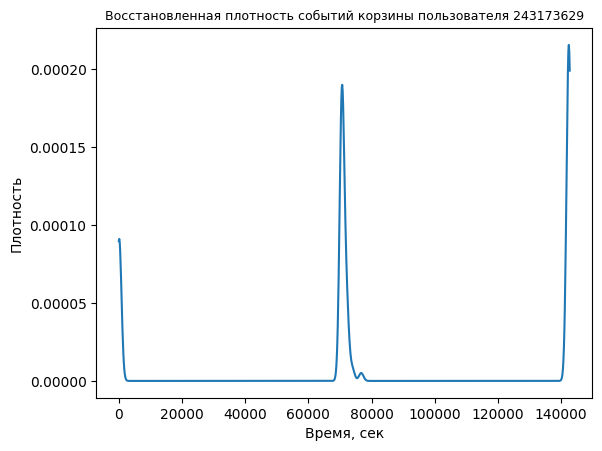

In [17]:
from sklearn.neighbors import KernelDensity

np.random.seed(1)

x = selected_user_events[['time_delta_sec']]

bwdth = x['time_delta_sec'].max() / 200
print(bwdth)

kde = KernelDensity(kernel='gaussian', bandwidth=bwdth).fit(x)

space = np.linspace(min(x['time_delta_sec']), max(x['time_delta_sec']), 1000).reshape(-1, 1)
log_density = kde.score_samples(space)

plt.plot(space, np.exp(log_density))
plt.xlabel('Время, сек')
plt.ylabel('Плотность')
plt.title(f'Восстановленная плотность событий корзины пользователя {user_id}', size=9)



In [18]:
InteractiveShell.ast_node_interactivity = current_ast_node_interactivity

In [19]:
one_user_events = user_events[user_events['user_id'] == user_id]
one_user_events = one_user_events[['event_time', 'category_id']]
one_user_events['event_time'] = pd.to_datetime(one_user_events['event_time'])

one_user_events.shape

pd.set_option('display.max_rows', len(one_user_events))
one_user_events = one_user_events.sort_values(by=['event_time'])
one_user_events
pd.reset_option('display.max_rows')

(220, 2)

event_time          category_id
3790720 2019-10-29 13:37:24+00:00  1487580007592100809
3790733 2019-10-29 13:37:27+00:00  1487580007592100809
3790802 2019-10-29 13:37:52+00:00  1487580007659209676
3790809 2019-10-29 13:37:54+00:00  1487580007659209676
3790811 2019-10-29 13:37:55+00:00  1487580007659209676
3790816 2019-10-29 13:37:59+00:00  1487580007659209676
3790822 2019-10-29 13:38:00+00:00  1487580007659209676
3790824 2019-10-29 13:38:00+00:00  1487580007659209676
3790832 2019-10-29 13:38:03+00:00  1487580007659209676
3790837 2019-10-29 13:38:05+00:00  1487580007659209676
3790994 2019-10-29 13:38:59+00:00  1487580007675986893
3790995 2019-10-29 13:38:59+00:00  1487580007675986893
3791019 2019-10-29 13:39:12+00:00  1487580007634043851
3791056 2019-10-29 13:39:28+00:00  1487580007634043851
3791059 2019-10-29 13:39:29+00:00  1487580007634043851
3791077 2019-10-29 13:39:37+00:00  1487580007634043851
3791081 2019-10-29 13:39:39+00:00  1487580007634043851
3791083 2019-10-29 13:39:39+00:00  1487580007634043851
3791090 2019-10-29 13:39:41+00:00  1487580007634043851
3791094 2019-10-29 13:39:42+00:00  1487580007634043851
3791106 2019-10-29 13:39:45+00:00  1487580007634043851
3791109 2019-10-29 13:39:45+00:00  1487580007634043851
3791132 2019-10-29 13:39:47+00:00  1487580007634043851
3791140 2019-10-29 13:39:49+00:00  1487580007634043851
3791230 2019-10-29 13:40:26+00:00  1487580007675986893
3791236 2019-10-29 13:40:29+00:00  1487580007675986893
3791239 2019-10-29 13:40:32+00:00  1487580007675986893
3791252 2019-10-29 13:40:40+00:00  1487580007675986893
3791267 2019-10-29 13:40:44+00:00  1487580007675986893
3791269 2019-10-29 13:40:45+00:00  1487580007675986893
3791274 2019-10-29 13:40:46+00:00  1487580007675986893
3791290 2019-10-29 13:40:52+00:00  1487580007675986893
3791328 2019-10-29 13:41:08+00:00  1487580007675986893
3791351 2019-10-29 13:41:18+00:00  1487580007675986893
3791363 2019-10-29 13:41:21+00:00  1487580007675986893
3791538 2019-10-29 13:42:25+00:00  1487580007675986893
3885593 2019-10-30 09:11:31+00:00  1487580009286598681
3885599 2019-10-30 09:11:35+00:00  1487580009286598681
3885619 2019-10-30 09:11:45+00:00  1487580009286598681
3885620 2019-10-30 09:11:45+00:00  1487580009286598681
3885625 2019-10-30 09:11:47+00:00  1487580009286598681
3885624 2019-10-30 09:11:47+00:00  1487580009286598681
3885632 2019-10-30 09:11:48+00:00  1487580009286598681
3885634 2019-10-30 09:11:49+00:00  1487580009286598681
3885635 2019-10-30 09:11:49+00:00  1487580009286598681
3885638 2019-10-30 09:11:50+00:00  1487580009286598681
3885641 2019-10-30 09:11:51+00:00  1487580009286598681
3885644 2019-10-30 09:11:53+00:00  1487580009286598681
3885645 2019-10-30 09:11:54+00:00  1487580009286598681
3885647 2019-10-30 09:11:55+00:00  1487580009286598681
3885649 2019-10-30 09:11:56+00:00  1487580009286598681
3885652 2019-10-30 09:12:00+00:00  1487580009286598681
3885654 2019-10-30 09:12:01+00:00  1487580009286598681
3885655 2019-10-30 09:12:03+00:00  1487580009286598681
3885661 2019-10-30 09:12:05+00:00  1487580009286598681
3885669 2019-10-30 09:12:08+00:00  1487580009286598681
3885675 2019-10-30 09:12:10+00:00  1487580009286598681
3885678 2019-10-30 09:12:11+00:00  1487580009286598681
3885680 2019-10-30 09:12:12+00:00  1487580009286598681
3885683 2019-10-30 09:12:14+00:00  1487580009286598681
3885685 2019-10-30 09:12:15+00:00  1487580009286598681
3885696 2019-10-30 09:12:22+00:00  1487580009286598681
3885699 2019-10-30 09:12:23+00:00  1487580009286598681
3885702 2019-10-30 09:12:24+00:00  1487580009286598681
3885703 2019-10-30 09:12:25+00:00  1487580009286598681
3885708 2019-10-30 09:12:26+00:00  1487580009286598681
3885710 2019-10-30 09:12:27+00:00  1487580009286598681
3885762 2019-10-30 09:12:55+00:00  1487580009286598681
3885774 2019-10-30 09:13:04+00:00  1487580009286598681
3885811 2019-10-30 09:13:26+00:00  1487580009311764506
3885829 2019-10-30 09:13:37+00:00  1487580009286598681
3885832 2019-10-30 09:13:39+00:00  1487580009286598681
3885834 

In [20]:
from IPython.core.interactiveshell import InteractiveShell
current_ast_node_interactivity = InteractiveShell.ast_node_interactivity
InteractiveShell.ast_node_interactivity = "last_expr"

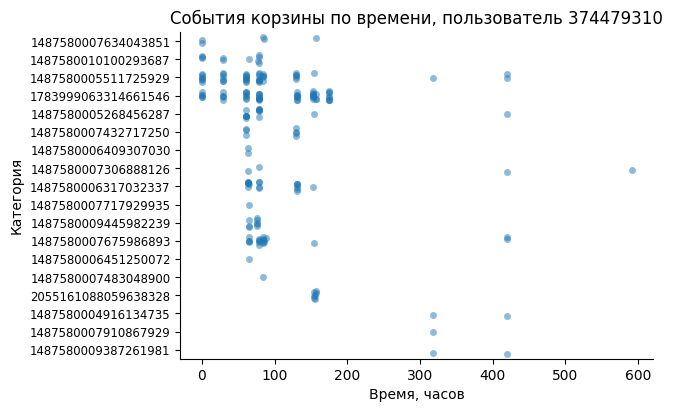

In [21]:
user_id = 374479310

def plot_user_events(user_id, savefig=False):
    one_user_events = user_events[user_events['user_id'] == user_id]
    one_user_events = one_user_events[['event_time', 'category_id']]
    one_user_events['event_time'] = pd.to_datetime(one_user_events['event_time'])

    one_user_events['time_delta'] = one_user_events['event_time'] - one_user_events.iloc[0]['event_time']
    one_user_events['time_delta_sec'] = one_user_events['time_delta'].apply(lambda x: x.total_seconds())
    one_user_events['time_delta_hrs'] = one_user_events['time_delta'].apply(lambda x: x.total_seconds()/(60 * 60))
    one_user_events['category_id_str'] = one_user_events['category_id'].apply(lambda x: str(x))

    total_events = one_user_events.shape[0]
    max_events_count = 150 if total_events > 150 else total_events
    select_events_count = int(total_events * 0.3) if total_events * 0.3 > max_events_count else max_events_count
    #one_user_events = one_user_events.iloc[np.random.choice(total_events, select_events_count, replace=False)]

    #ax = sns.swarmplot(data=one_user_events, x="time_delta_sec", y="category_id_str", size=3)
    select_events_count = total_events
    #plt.figure(figsize=(15,15))
    fig = plt.figure()
    ax = sns.catplot(data=one_user_events, x="time_delta_hrs", y="category_id_str", jitter=0.25, height=4, aspect=7/4)
    plt.setp(ax.ax.collections, alpha=.5)
    ax.ax.set_title(f'События корзины по времени, пользователь {user_id}')
    ax.ax.set_xlabel('Время, часов')
    ax.ax.tick_params(axis='y', which='major', labelsize='small')
    ax.ax.set_ylabel('Категория')

    if savefig:
        plt.savefig(f'{RESULTS_PATH}/user_{user_id}_category_events.png', dpi=300)        
    plt.close(fig)
        
plot_user_events(user_id)

plt.ion()

In [25]:
plt.ioff()

user_ids = [34033932, 187565158, 202472817, 263366743, 230804370, 230818889, 243173629, 263366743, \
            276624000, 300688877, 288864056, 313751489, 338640563, 355933481, 374479310]

for user_id in user_ids:
    plot_user_events(user_id, True)

plt.close('all')
plt.ion()

Text(0.5, 1.0, 'Интервалы событий пользователя 374479310')

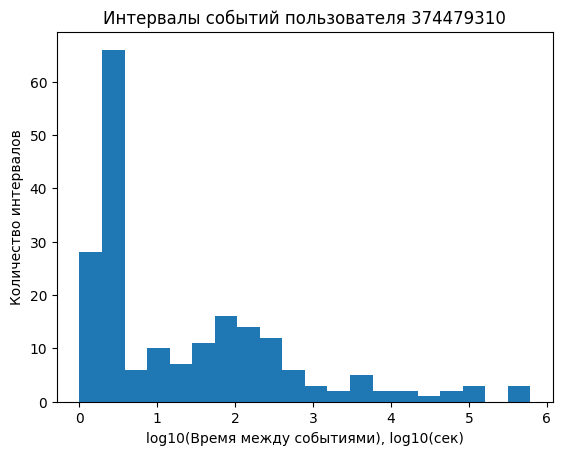

In [17]:
one_user_events = user_events[user_events['user_id'] == user_id]
one_user_events = one_user_events[['event_time', 'category_id']]
one_user_events['event_time'] = pd.to_datetime(one_user_events['event_time'])

one_user_events['time_delta'] = one_user_events['event_time'] - one_user_events.iloc[0]['event_time']
one_user_events['time_delta_sec'] = one_user_events['time_delta'].apply(lambda x: x.total_seconds())

def compute_events_time_difference(user_events_df):
    left = user_events_df[1:].reset_index(drop=True).add_suffix('_after')
    right = user_events_df[:len(user_events_df)-1].reset_index(drop=True).add_suffix('_before') 
    joined = pd.concat([left, right], axis=1)
    joined['interval_sec'] = joined['time_delta_sec_after'] - joined['time_delta_sec_before']
    return joined
    
one_user_time_diffs = compute_events_time_difference(one_user_events[['time_delta_sec']])
#ne_user_time_diffs

plt.hist(np.log10(one_user_time_diffs['interval_sec'] + 1), bins=20)
plt.xlabel('log10(Время между событиями), log10(сек)')
plt.ylabel('Количество интервалов')
plt.title(f'Интервалы событий пользователя {user_id}')


In [22]:
InteractiveShell.ast_node_interactivity = current_ast_node_interactivity